In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/adult11.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<Axes: xlabel='age', ylabel='Count'>

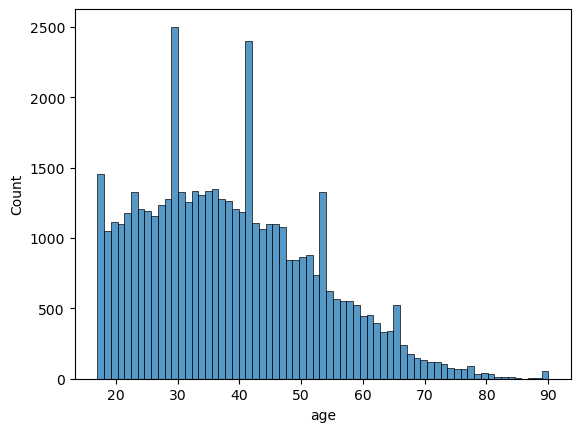

In [3]:
sns.histplot(df['age'])

In [4]:
age_bins = [0,18,25,35,45,55,70,100]
age_labels = ['0-18','18-25','25-35','35-45','45-55','55-70','70-100']
df['age_grp'] = pd.cut(df['age'],bins=age_bins,labels=age_labels)
df[['age_grp','age']].head()

,age_grp,age
0,18-25,25
1,35-45,38
2,25-35,28
3,35-45,44
4,0-18,18


In [5]:
df.groupby('age_grp')['salary'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12232\742136065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_grp')['salary'].value_counts()


age_grp  salary
0-18     <=50K      1457
         >50K          0
18-25    <=50K      8001
         >50K        169
25-35    <=50K     10340
         >50K       2379
35-45    <=50K      7821
         >50K       4131
45-55    <=50K      5041
         >50K       3255
55-70    <=50K      3778
         >50K       1602
70-100   <=50K       717
         >50K        151
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  object  
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  object  
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  object  
 6   occupation      48842 non-null  object  
 7   relationship    48842 non-null  object  
 8   race            48842 non-null  object  
 9   gender          48842 non-null  object  
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  object  
 14  salary          48842 non-null  object  
 15  age_grp         48842 non-null  category
dtypes: category(1), int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary,age_grp
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,18-25
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,35-45
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,25-35
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,35-45
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0-18


In [9]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [10]:
df_work_class = df.groupby('workclass')['salary'].value_counts().reset_index()
df_work_class.head()

,workclass,salary,count
0,?,<=50K,2534
1,?,>50K,265
2,Federal-gov,<=50K,871
3,Federal-gov,>50K,561
4,Local-gov,<=50K,2209


C:\Users\DELL\AppData\Local\Temp\ipykernel_12232\1711659260.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


[Text(0, 0, '?'),
 Text(1, 0, 'Federal-gov'),
 Text(2, 0, 'Local-gov'),
 Text(3, 0, 'Never-worked'),
 Text(4, 0, 'Private'),
 Text(5, 0, 'Self-emp-inc'),
 Text(6, 0, 'Self-emp-not-inc'),
 Text(7, 0, 'State-gov'),
 Text(8, 0, 'Without-pay')]

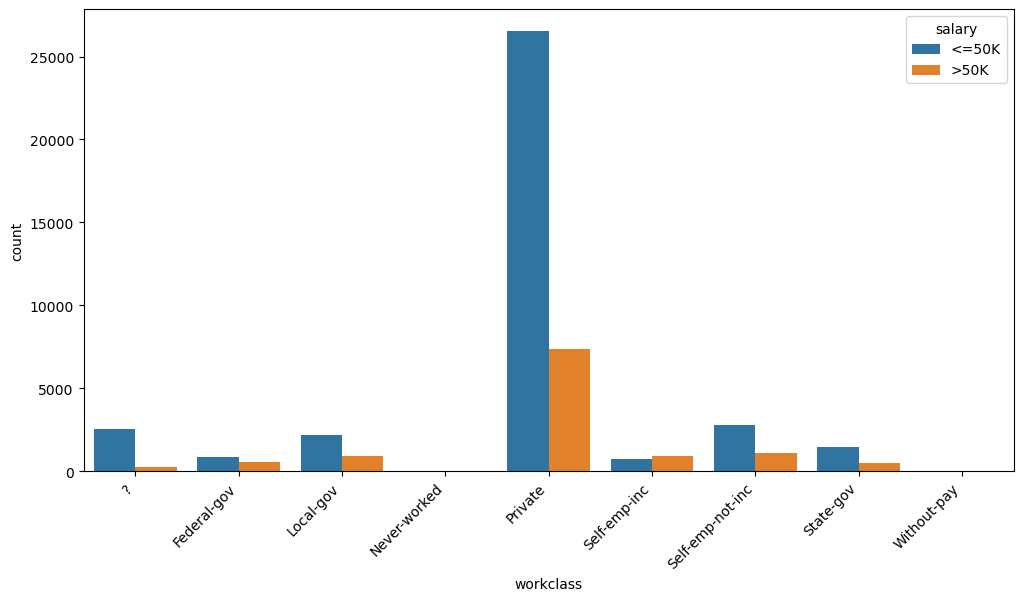

In [11]:
df_work_class.head()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = 'workclass',y = 'count',hue = 'salary',data = df_work_class,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

In [12]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [13]:
df_edu = df.groupby('education')
df_edu['salary'].value_counts()

education     salary
10th          <=50K      1302
              >50K         87
11th          <=50K      1720
              >50K         92
12th          <=50K       609
              >50K         48
1st-4th       <=50K       239
              >50K          8
5th-6th       <=50K       482
              >50K         27
7th-8th       <=50K       893
              >50K         62
9th           <=50K       715
              >50K         41
Assoc-acdm    <=50K      1188
              >50K        413
Assoc-voc     <=50K      1539
              >50K        522
Bachelors     <=50K      4712
              >50K       3313
Doctorate     >50K        431
              <=50K       163
HS-grad       <=50K     13281
              >50K       2503
Masters       >50K       1459
              <=50K      1198
Preschool     <=50K        82
              >50K          1
Prof-school   >50K        617
              <=50K       217
Some-college  <=50K      8815
              >50K       2063
Name: count, dtype:

In [14]:
df['education-num'].value_counts().sort_index()

education-num
1        83
2       247
3       509
4       955
5       756
6      1389
7      1812
8       657
9     15784
10    10878
11     2061
12     1601
13     8025
14     2657
15      834
16      594
Name: count, dtype: int64

In [15]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_12232\3051073300.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


[Text(0, 0, 'Divorced'),
 Text(1, 0, 'Married-AF-spouse'),
 Text(2, 0, 'Married-civ-spouse'),
 Text(3, 0, 'Married-spouse-absent'),
 Text(4, 0, 'Never-married'),
 Text(5, 0, 'Separated'),
 Text(6, 0, 'Widowed')]

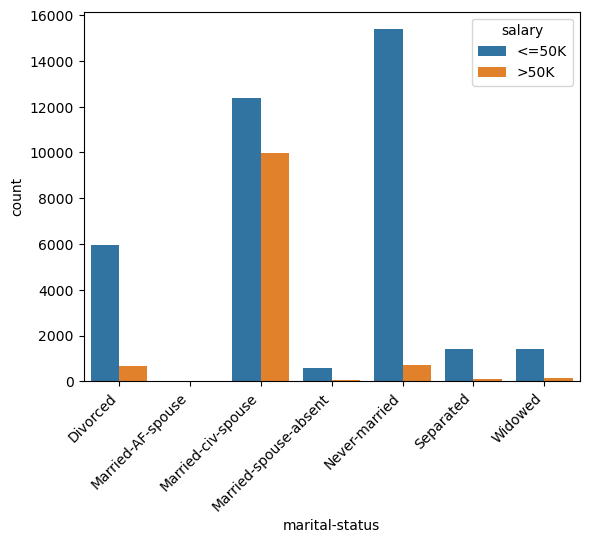

In [16]:
ax = sns.barplot(data = df.groupby('marital-status')['salary'].value_counts().reset_index(),x = 'marital-status',y = 'count',hue = 'salary')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary,age_grp
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,18-25
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,35-45
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,25-35
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,35-45
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0-18


In [18]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [19]:
df_occu = df.groupby('occupation')
df_occu['salary'].value_counts()

occupation         salary
?                  <=50K     2544
                   >50K       265
Adm-clerical       <=50K     4843
                   >50K       768
Armed-Forces       <=50K       10
                   >50K         5
Craft-repair       <=50K     4729
                   >50K      1383
Exec-managerial    <=50K     3178
                   >50K      2908
Farming-fishing    <=50K     1317
                   >50K       173
Handlers-cleaners  <=50K     1934
                   >50K       138
Machine-op-inspct  <=50K     2650
                   >50K       372
Other-service      <=50K     4719
                   >50K       204
Priv-house-serv    <=50K      239
                   >50K         3
Prof-specialty     <=50K     3388
                   >50K      2784
Protective-serv    <=50K      675
                   >50K       308
Sales              <=50K     4029
                   >50K      1475
Tech-support       <=50K     1026
                   >50K       420
Transport-moving   <=5

In [20]:
df[['marital-status','relationship','gender']].head(20)

,marital-status,relationship,gender
0,Never-married,Own-child,Male
1,Married-civ-spouse,Husband,Male
2,Married-civ-spouse,Husband,Male
3,Married-civ-spouse,Husband,Male
4,Never-married,Own-child,Female
5,Never-married,Not-in-family,Male
6,Never-married,Unmarried,Male
7,Married-civ-spouse,Husband,Male
8,Never-married,Unmarried,Female
9,Married-civ-spouse,Husband,Male


In [21]:
df['Family'].head(20)

KeyError: 'Family'

In [ ]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

race                salary
Amer-Indian-Eskimo  <=50K       415
                    >50K         55
Asian-Pac-Islander  <=50K      1110
                    >50K        409
Black               <=50K      4119
                    >50K        566
Other               <=50K       356
                    >50K         50
White               <=50K     31155
                    >50K      10607
Name: count, dtype: int64

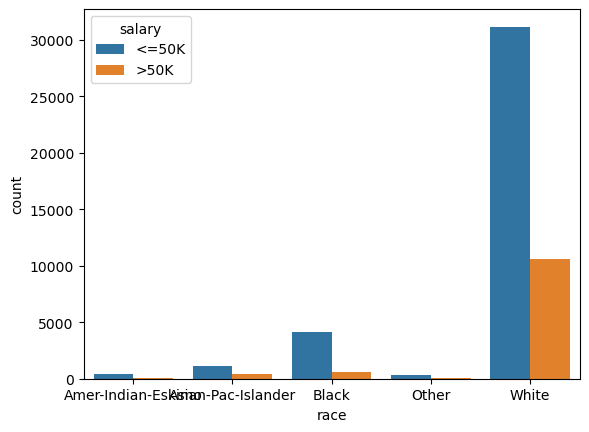

In [ ]:
df_race = df.groupby('race')
ax = sns.barplot(data = df_race['salary'].value_counts().reset_index(),x = 'race',y = 'count',hue = 'salary')
df_race['salary'].value_counts()

In [ ]:
df.groupby('gender')['salary'].value_counts()

gender  salary
Female  <=50K     14423
        >50K       1769
Male    <=50K     22732
        >50K       9918
Name: count, dtype: int64

In [ ]:
def bar(col):
    ax = sns.barplot(data = df.groupby(col)['salary'].value_counts().reset_index(),x = col,y = 'count',hue = 'salary')


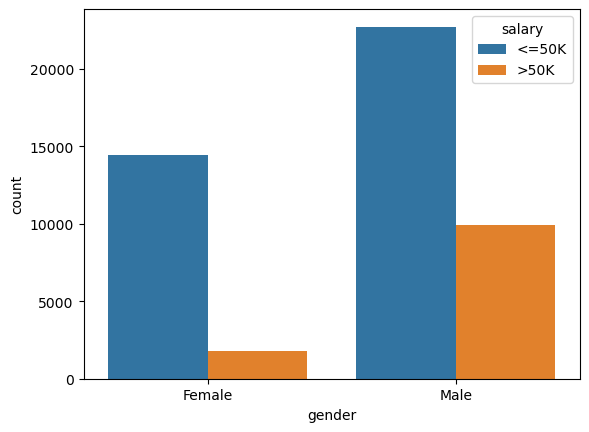

In [ ]:
bar('gender')

In [ ]:
len(df[df['capital-gain'] == 0]) - len(df)

-4035

In [ ]:
len(df[df['capital-loss'] == 0]) - len(df)

-2282

In [ ]:
df_copy = df
df.drop(['capital-gain','capital-loss'],axis = 1,inplace = True)

In [ ]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [ ]:
len(df['native-country'].unique())

42

In [ ]:
df['United-States'] = df['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)
df['United-States'].head()

0    1
1    1
2    1
3    1
4    1
Name: United-States, dtype: int64

In [ ]:
df['Family']

0                       Own-child
1                         Married
2                         Married
3                         Married
4                       Own-child
                   ...           
48837                     Married
48838                     Married
48839    Widowed Unmarried Female
48840                   Own-child
48841                     Married
Name: Family, Length: 48842, dtype: object

In [ ]:
# df['Family'] = df['marital-status'] + ' ' +  df['relationship'] + " " +  df['gender']
# df['Family'] = df['Family'].apply(lambda x: 'Own-child' if x.split(' ')[1] == 'Own-child' else x)
# df['Family'] = df['Family'].apply(lambda x : 'Married' if x == 'Married-civ-spouse Husband Male' else x)
# df['Family'] = df['Family'].apply(lambda x : 'Married' if x == 'Married-civ-spouse Wife Female' else x)
# df['Family'] = df['Family'].apply(lambda x : 'Married' if x == 'Married-AF-spouse Husband Male' else x)
# df['Family'] = df['Family'].apply(lambda x : 'Married' if x == 'Married-AF-spouse Wife Female' else x)
# df['Family'] = df['Family'].apply(lambda x : 'Never-married' if x.split(' ')[0] == 'Never-married' else x)
df['Family'] = df['Family'].apply(lambda x : 'Divorced' if x.split(' ')[0] == 'Divorced' else x)
df['Family'] = df['Family'].apply(lambda x : 'Widowed ' if x.split(' ')[0] == 'Widowed' else x)
df['Family'].value_counts()
# df['Family'].head()

Family
Married                                        22043
Never-married                                   9367
Own-child                                       7581
Divorced                                        6178
Widowed                                         1493
Separated Unmarried Female                       561
Separated Not-in-family Male                     394
Separated Not-in-family Female                   243
Married-spouse-absent Not-in-family Male         213
Married-spouse-absent Unmarried Female           129
Married-spouse-absent Not-in-family Female       117
Married-civ-spouse Other-relative Male           107
Separated Unmarried Male                         107
Married-civ-spouse Other-relative Female          94
Married-spouse-absent Unmarried Male              54
Separated Other-relative Female                   50
Married-spouse-absent Other-relative Male         36
Separated Other-relative Male                     29
Married-spouse-absent Other-relative Fe

In [ ]:
df['hours-per-week'].value_counts().sort_values(ascending= False).head(20)

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
20     1862
30     1700
55     1051
25      958
48      770
38      714
15      623
70      437
10      425
32      423
65      355
24      354
42      338
36      336
44      310
Name: count, dtype: int64

<Axes: >

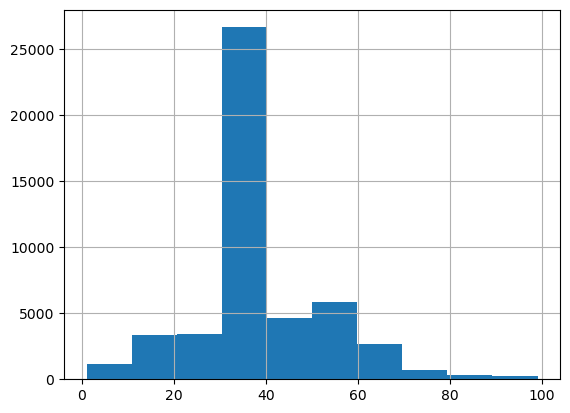

In [ ]:
df['hours-per-week'].hist()

In [ ]:
onehot = ['workclass','marital_status','occupation','afmily','race']
oedinal = []

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['workclass', 'marital-status', 'occupation'])
], remainder='passthrough')

In [ ]:
df_trans = transformer.fit_transform(df)

In [ ]:
df_trans

array([[0.0, 0.0, 0.0, ..., '18-25', 'Own-child', 1],
       [0.0, 0.0, 0.0, ..., '35-45', 'Married', 1],
       [0.0, 1.0, 0.0, ..., '25-35', 'Married', 1],
       ...,
       [0.0, 0.0, 0.0, ..., '55-70', 'Widowed ', 1],
       [0.0, 0.0, 0.0, ..., '18-25', 'Own-child', 1],
       [0.0, 0.0, 0.0, ..., '45-55', 'Married', 1]], dtype=object)

In [ ]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [ ]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
df = df[df['occupation'] != '?']
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [54]:
df.head()

,age,workclass,education-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,salary,age_grp,Married
0,25,Private,7,Never-married,Machine-op-inspct,Male,0,0,40,United-States,<=50K,18-25,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Male,0,0,50,United-States,<=50K,35-45,1
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Male,0,0,40,United-States,>50K,25-35,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,United-States,>50K,35-45,1
4,18,?,10,Never-married,?,Female,0,0,30,United-States,<=50K,0-18,0


<Axes: xlabel='age', ylabel='education-num'>

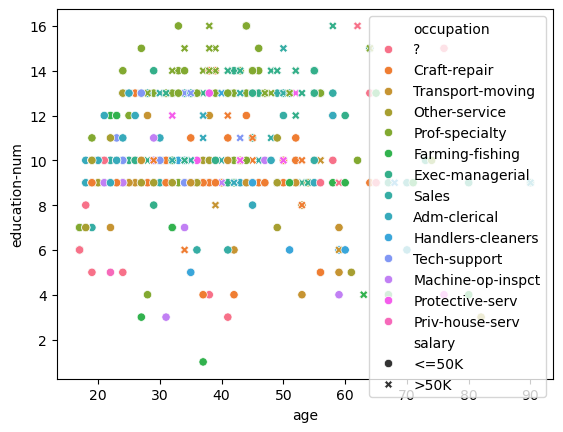

In [55]:
sns.scatterplot(data = df.sample(500), x = 'age', y = 'education-num',hue='occupation',style = "salary")

In [38]:
df_clean = df

In [44]:
df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [43]:
df_clean.drop(['fnlwgt','education'],axis=1,inplace=True)

In [45]:
def married(m):
    if m == 'Husband' or m == 'Wife':
        return 1
    else:
        return 0

In [46]:
df_clean['Married'] = df_clean['relationship'].apply(married)

In [ ]:
df_clean[['Married','relationship']]

,Married,relationship
0,0,Own-child
1,1,Husband
2,1,Husband
3,1,Husband
4,0,Own-child
...,...,...
48837,1,Wife
48838,1,Husband
48839,0,Unmarried
48840,0,Own-child


In [49]:
df_clean.drop('relationship',axis = 1,inplace=True)

In [50]:
df_clean.head()

,age,workclass,education-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary,age_grp,Married
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K,18-25,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K,35-45,1
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K,25-35,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K,35-45,1
4,18,?,10,Never-married,?,White,Female,0,0,30,United-States,<=50K,0-18,0


In [51]:
df_clean.drop('race',axis=1,inplace=True)

In [58]:
df_clean.drop('marital-status',axis=1,inplace=True)

In [59]:
df_clean.head()

,age,workclass,education-num,gender,capital-gain,capital-loss,hours-per-week,native-country,salary,age_grp,Married
0,25,Private,7,Male,0,0,40,United-States,<=50K,18-25,0
1,38,Private,9,Male,0,0,50,United-States,<=50K,35-45,1
2,28,Local-gov,12,Male,0,0,40,United-States,>50K,25-35,1
3,44,Private,10,Male,7688,0,40,United-States,>50K,35-45,1
4,18,?,10,Female,0,0,30,United-States,<=50K,0-18,0


In [60]:
def capital(c):
    if c == 0:
        return 0
    else:
        return 1

In [61]:
df_clean['capital-gain'] = df['capital-gain'].apply(capital)

In [62]:
df_clean['capital-loss'] = df['capital-loss'].apply(capital)

In [68]:
df_clean.groupby('capital-gain')['capital-loss'].value_counts()

capital-gain  capital-loss
0             0               42525
              1                2282
1             0                4035
Name: count, dtype: int64

In [ ]:
df_clean.groupby('capital-loss')['salary'].value_counts()

In [ ]:
# Also try by seperating columns for maried and own child

In [ ]:
df['Family'].value_counts()

Family
Married                                        21140
Never-married                                   8936
Own-child                                       6706
Divorced                                        5933
Widowed                                         1276
Separated Unmarried Female                       525
Separated Not-in-family Male                     372
Separated Not-in-family Female                   228
Married-spouse-absent Not-in-family Male         198
Married-spouse-absent Unmarried Female           121
Married-civ-spouse Other-relative Male           104
Married-spouse-absent Not-in-family Female       104
Separated Unmarried Male                         103
Married-civ-spouse Other-relative Female          86
Married-spouse-absent Unmarried Male              51
Separated Other-relative Female                   47
Married-spouse-absent Other-relative Male         33
Separated Other-relative Male                     28
Married-spouse-absent Other-relative Fe

In [ ]:
df['Family'] = df['Family'].apply(lambda x : 'unmaried' if x.split(' ')[0] == "Separated" else x)
df['Family'] = df['Family'].apply(lambda x : 'Married' if x.split(' ')[0].split('-')[0] == "Married" else x)
df['Family'] = df['Family'].apply(lambda x : 'unmarried' if x == "Divorced" else x)
df['Family'] = df['Family'].apply(lambda x : 'unmarried' if x == "unmaried" else x)
df['Family'] = df['Family'].apply(lambda x : 'unmarried' if x == "Widowed" else x)
df['Family'].value_counts()

KeyError: 'Family'

In [ ]:
# df['Family'] = df['Family'].apply(lambda x : 'unmarried' if x[0] == "W" else x)

In [ ]:
df['Family'].value_counts()

Family
Married          21879
Never-married     8936
unmarried         8512
Own-child         6706
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['age','workclass','education-num','Family','occupation','race','gender','hours-per-week','United-States']
x_features = df[features]

In [ ]:
x_features

,age,workclass,education-num,Family,occupation,race,gender,hours-per-week,United-States
0,25,Private,7,Own-child,Machine-op-inspct,Black,Male,40,1
1,38,Private,9,Married,Farming-fishing,White,Male,50,1
2,28,Local-gov,12,Married,Protective-serv,White,Male,40,1
3,44,Private,10,Married,Machine-op-inspct,Black,Male,40,1
5,34,Private,6,Never-married,Other-service,White,Male,30,1
...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married,Tech-support,White,Female,38,1
48838,40,Private,9,Married,Machine-op-inspct,White,Male,40,1
48839,58,Private,9,unmarried,Adm-clerical,White,Female,40,1
48840,22,Private,9,Own-child,Adm-clerical,White,Male,20,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_features.values, df['salary'].values, test_size=0.33, random_state=42)

In [ ]:
X_train

array([[45, 'State-gov', 14, ..., 'Male', 38, 1],
       [17, 'Private', 8, ..., 'Female', 25, 1],
       [42, 'Self-emp-not-inc', 14, ..., 'Male', 50, 1],
       ...,
       [39, 'Private', 10, ..., 'Male', 40, 1],
       [43, 'Private', 9, ..., 'Male', 40, 1],
       [32, 'Private', 11, ..., 'Male', 45, 1]], dtype=object)

In [ ]:
y_train.shape

(30842,)

In [ ]:
trans = ColumnTransformer(transformers=[
    ('k',OneHotEncoder(sparse_output=False,drop = 'first'),['workclass','Family','occupation','race','gender']),
    ('l',StandardScaler(),['age','education-num','hours-per-week','United-States'])
],remainder='passthrough')

In [ ]:
X_train = pd.DataFrame(X_train, columns=features)  # Convert NumPy array to DataFrame

X_train = trans.fit_transform(X_train)

In [ ]:
X_test = pd.DataFrame(X_test, columns=features)
X_test = trans.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lin_reg = LogisticRegression()
ds = DecisionTreeClassifier()

In [ ]:
lin_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_pred=y_pred,y_true=y_test,zero_division=0)
print(cr)

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     11392
        >50K       0.69      0.55      0.61      3799

    accuracy                           0.83     15191
   macro avg       0.78      0.73      0.75     15191
weighted avg       0.82      0.83      0.82     15191



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88     11392
        >50K       0.64      0.55      0.59      3799

    accuracy                           0.81     15191
   macro avg       0.75      0.72      0.73     15191
weighted avg       0.80      0.81      0.81     15191



In [ ]:
ds.fit(X_train, y_train)

y_pred_rf = ds.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.85      0.87      0.86     11392
        >50K       0.57      0.53      0.55      3799

    accuracy                           0.78     15191
   macro avg       0.71      0.70      0.70     15191
weighted avg       0.78      0.78      0.78     15191



Further tips for improving score in future

see whats the relationship of the columns having mising values
look on ? data
remove outliars from age column
use the bins age column
Lable encoding